In [1]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_action(s, w):
  return 1 if s.dot(w) > 0 else 0

In [3]:
def play_one_episode(env, params):
  observation = env.reset()
  done = False
  t = 0

  while not done and t < 10000:
    # env.render()
    t += 1
    action = get_action(observation, params)
    observation, reward, done, info = env.step(action)
    if done:
      break

  return t

In [4]:
def play_multiple_episodes(env, T, params):
  episode_lengths = np.empty(T)

  for i in range(T):
    episode_lengths[i] = play_one_episode(env, params)

  avg_length = episode_lengths.mean()
  print("avg length:", avg_length)
  return avg_length

In [5]:
def random_search(env):
  episode_lengths = []
  best = 0
  params = None
  for t in range(100):
    new_params = np.random.random(4)*2 - 1
    avg_length = play_multiple_episodes(env, 100, new_params)
    episode_lengths.append(avg_length)

    if avg_length > best:
      params = new_params
      best = avg_length
  return episode_lengths, params

avg length: 9.1
avg length: 62.9
avg length: 9.23
avg length: 12.32
avg length: 102.38
avg length: 9.51
avg length: 35.54
avg length: 30.51
avg length: 9.57
avg length: 9.33
avg length: 9.0
avg length: 8.92
avg length: 125.14
avg length: 8.99
avg length: 9.43
avg length: 8.83
avg length: 8.97
avg length: 12.28
avg length: 9.03
avg length: 8.91
avg length: 9.7
avg length: 9.41
avg length: 198.08
avg length: 9.1
avg length: 9.21
avg length: 37.06
avg length: 58.44
avg length: 169.45
avg length: 9.65
avg length: 9.45
avg length: 92.53
avg length: 88.18
avg length: 9.48
avg length: 9.32
avg length: 8.79
avg length: 30.32
avg length: 30.37
avg length: 155.19
avg length: 9.28
avg length: 9.31
avg length: 33.01
avg length: 16.65
avg length: 9.23
avg length: 132.9
avg length: 133.7
avg length: 9.27
avg length: 50.06
avg length: 56.11
avg length: 9.18
avg length: 9.26
avg length: 9.36
avg length: 31.25
avg length: 22.36
avg length: 43.46
avg length: 107.6
avg length: 66.66
avg length: 9.6
avg l

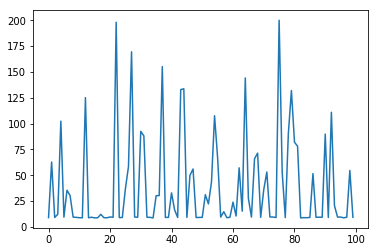

***Final run with final weights***
avg length: 200.0


200.0

In [6]:
env = gym.make('CartPole-v0')
episode_lengths, params = random_search(env)
plt.plot(episode_lengths)
plt.show()

# play a final set of episodes
print("***Final run with final weights***")
play_multiple_episodes(env, 100, params)